<center><h1>DIABETES ANALYSIS</h1></center>

### Importing Necessary Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading Datasets

In [77]:
df = pd.read_csv("diabetes_short.csv")
df.head(2)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes


### Exploratory Data Analysis

In [78]:
df.shape

(390, 16)

In [79]:
df["bmi"] = [i.replace(",",".") for i in df["bmi"]]
df["waist_hip_ratio"] = [i.replace(",",".") for i in df["waist_hip_ratio"]]
df["chol_hdl_ratio"] = [i.replace(",",".") for i in df["chol_hdl_ratio"]]
df["bmi"] = df["bmi"].astype(float)
df["waist_hip_ratio"] = df["waist_hip_ratio"].astype(float)
df["chol_hdl_ratio"] = df["chol_hdl_ratio"].astype(float)

In [80]:
df = df.drop(["patient_number"],axis=1)
df["chol_hdl_ratio"] = df["cholesterol"]/df["hdl_chol"]
df["waist_hip_ratio"] = df["waist"]/df["hip"]
df = df.drop(["cholesterol","waist","hdl_chol","hip"],axis=1)
df.head(3)

,glucose,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist_hip_ratio,diabetes
0,77,3.938776,19,female,61,119,22.5,118,70,0.842105,No diabetes
1,79,3.560976,19,female,60,135,26.4,108,58,0.825000,No diabetes
2,75,4.018519,20,female,67,187,29.3,110,72,0.888889,No diabetes


In [81]:
df.dtypes

glucose              int64
chol_hdl_ratio     float64
age                  int64
gender              object
height               int64
weight               int64
bmi                float64
systolic_bp          int64
diastolic_bp         int64
waist_hip_ratio    float64
diabetes            object
dtype: object

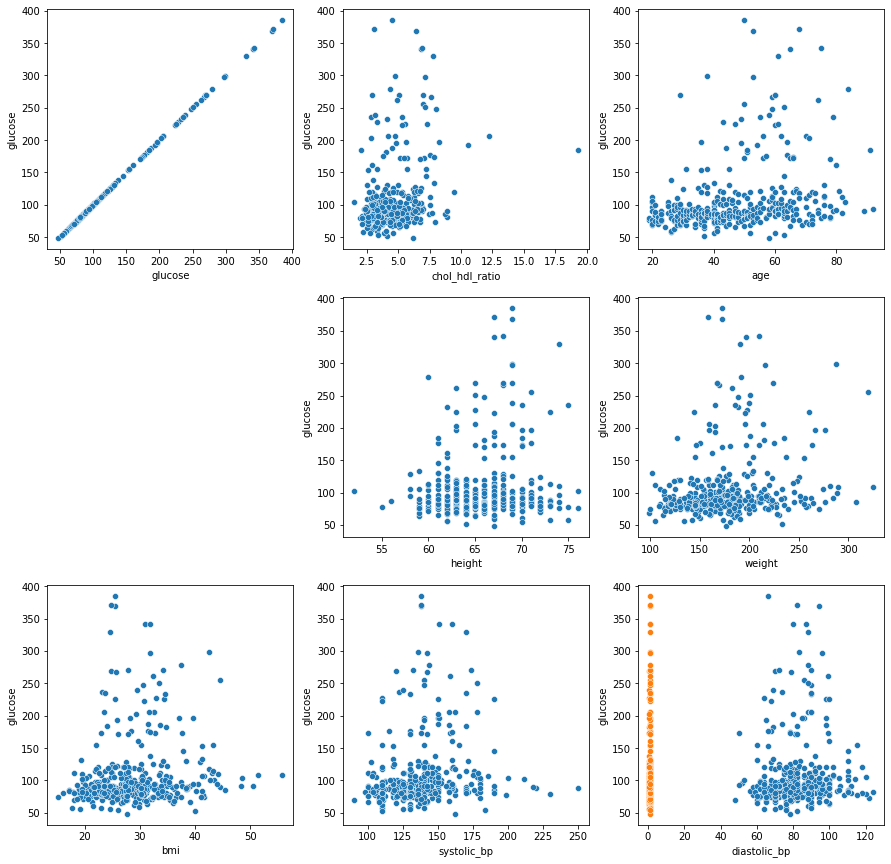

In [82]:
plt.figure(figsize=(15,15))
counter = 1
for col in df.columns:
    if df[col].dtypes != object:
        try:
            plt.subplot(3,3,counter)
        except:
            pass
        sns.scatterplot(df[col],df["glucose"])
    counter = counter + 1
plt.show()

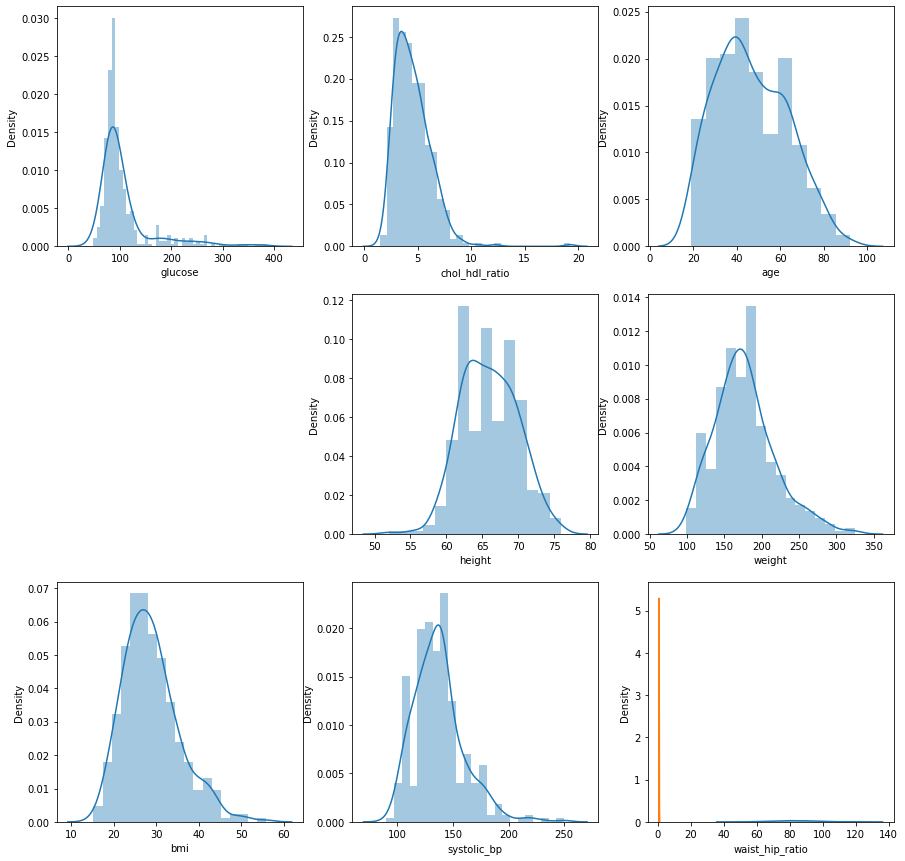

In [83]:
plt.figure(figsize=(15,15))
counter = 1
for col in df.columns:
    if df[col].dtypes != object:
        try:
            plt.subplot(3,3,counter)
        except:
            pass
        sns.distplot(df[col])
    counter = counter + 1
plt.show()

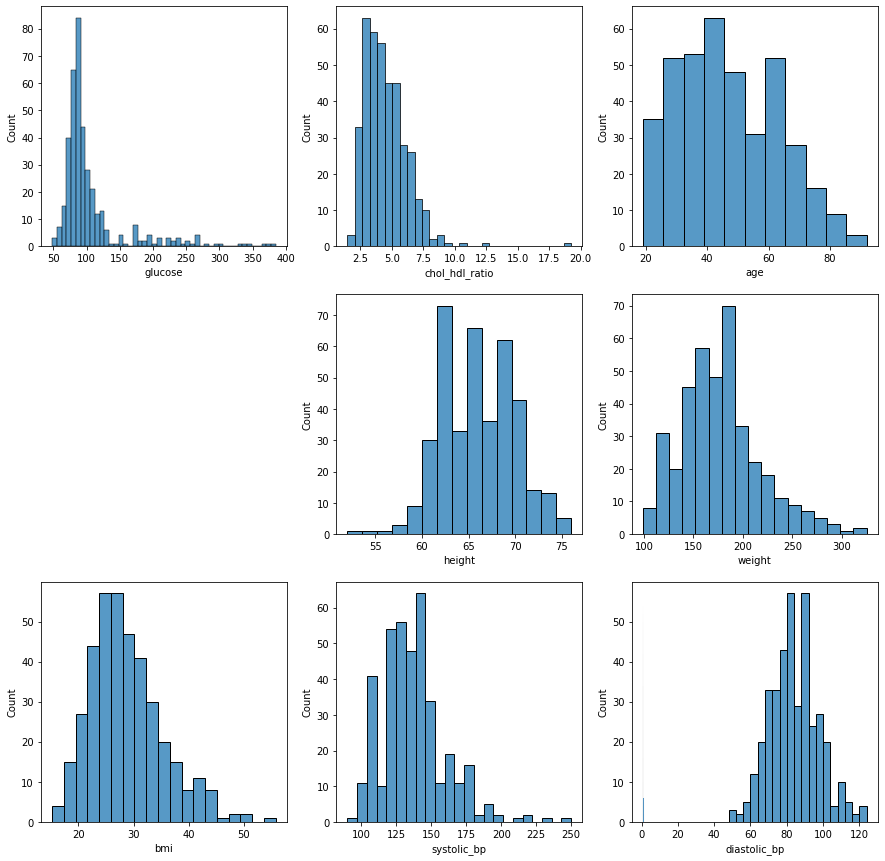

In [85]:
plt.figure(figsize=(15,15))
counter = 1
for col in df.columns:
    if df[col].dtypes != object:
        try:
            plt.subplot(3,3,counter)
        except:
            pass
        sns.histplot(df[col])
    counter = counter + 1
plt.show()

<AxesSubplot:xlabel='diabetes', ylabel='count'>

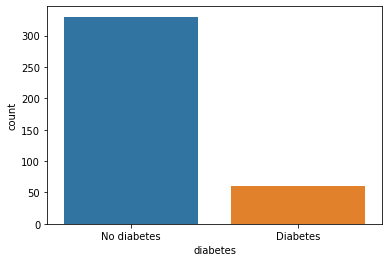

In [5]:
sns.countplot(df['diabetes'])

<AxesSubplot:xlabel='gender', ylabel='count'>

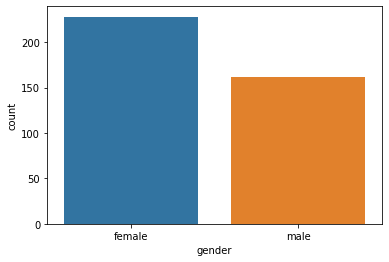

In [86]:
sns.countplot(df["gender"])

### Data Preprocessing

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"],df["diabetes"] = le.fit_transform(df["gender"]),le.fit_transform(df["diabetes"])

In [88]:
df.head()

,glucose,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist_hip_ratio,diabetes
0,77,3.938776,19,0,61,119,22.5,118,70,0.842105,1
1,79,3.560976,19,0,60,135,26.4,108,58,0.825000,1
2,75,4.018519,20,0,67,187,29.3,110,72,0.888889,1
3,97,3.228571,20,0,64,114,19.6,122,64,0.794872,1
4,91,2.447761,20,0,70,141,20.2,122,86,0.820513,1


In [89]:
train = df.drop(["diabetes"],axis=1)
label = df["diabetes"]

In [90]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(train)
X = pd.DataFrame(X,columns=train.columns)

In [91]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2020)
X,y = ros.fit_resample(X,label)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

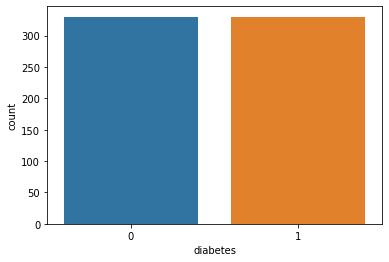

In [92]:
sns.countplot(y)

### Modelling and Model Selection

In [93]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix
X_trains,X_tests,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [94]:
X_train = X_trains
X_test = X_tests

In [95]:
from xgboost import XGBClassifier
model = XGBClassifier(
    eval_metric='logloss',
)
model.fit(X_train,y_train)
prd_x = model.predict(X_test)
accuracy_score(y_test,prd_x)

0.9545454545454546

In [16]:
feat = pd.DataFrame(X_test)
lab = pd.Series(y_test)

### Model Evaluation

Text(0.5, 24.0, 'Original')

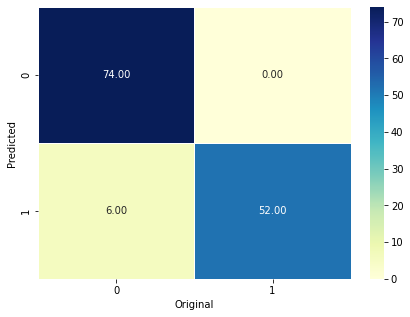

In [17]:
pred = model.predict(X_test)
fig,ax = plt.subplots(figsize=(7,5))
ax = sns.heatmap(confusion_matrix(y_test,pred),
                annot=True,
                linewidths=0.5,
                fmt = '.2f',
                cmap='YlGnBu'
                )
plt.ylabel('Predicted')
plt.xlabel('Original')

<AxesSubplot:ylabel='count'>

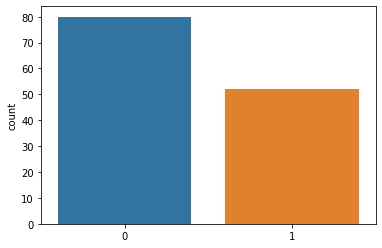

In [106]:
prd = model.predict(X_test)
sns.countplot(prd)

In [107]:
feat.head()

,0,1,2,3,4,5,6,7,8
0,0.566766,0.534247,1.0,0.708333,0.446903,0.21875,0.276316,0.096056,0.279787
1,0.145401,0.219178,1.0,0.916667,0.314159,0.20000,0.184211,0.160815,0.347665
2,0.118694,0.027397,1.0,0.708333,0.247788,0.12500,0.263158,0.077933,0.245215
3,0.213650,0.383562,0.0,0.458333,0.252212,0.32500,0.710526,0.269774,0.467678
4,0.519288,0.561644,1.0,0.625000,0.429204,0.12500,0.263158,0.216396,0.639699


In [122]:
model.predict([np.array(feat.iloc[4,:])])

array([0])

In [119]:
pd.Series(lab).head()

541    0
103    1
14     1
526    0
298    0
Name: diabetes, dtype: int32

In [18]:
X_trains.head()

,glucose,age,gender,height,weight,systolic_bp,diastolic_bp,chol_hdl_ratio,waist_hip_ratio
202,0.243323,0.356164,1.0,0.625000,0.526549,0.5125,0.815789,0.196363,0.497340
399,0.649852,0.547945,1.0,0.666667,0.309735,0.3250,0.407895,0.344221,0.575982
278,0.172107,0.534247,1.0,0.583333,0.513274,0.6000,0.710526,0.129701,0.788732
652,0.738872,0.465753,1.0,0.708333,0.517699,0.3250,0.631579,0.316787,0.593740
617,0.210682,0.602740,0.0,0.458333,0.261062,0.4375,0.263158,0.191248,0.276995


### Saving Model For Deployment

In [1]:
path = "models"
pickle.dump(model,open(path+'\diabetes.pkl','wb'))

In [124]:
model1 = pickle.load(open(path+'\diabetes.pkl','rb'))

In [126]:
model.predict([np.array(feat.iloc[4,:])])

array([0])